# Exploratory Data Analysis-Retail
### Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’ 

### As a business manager, try to find out the weak areas where you can work to make more profit.

### What all business problems you can derive by exploring the data?

### By
# -Shreyas Palod


In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

In [2]:
#reading data
Retail= pd.read_csv('D:\SampleSuperstore.csv')

In [3]:
Retail.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
print('Total rows:', Retail.shape[0])
print('Total columns:', Retail.shape[1])

Total rows: 9994
Total columns: 13


### Cleaning & Processing Data

In [5]:
Retail.isnull().sum(axis = 0).to_frame()

,0
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


In [6]:
Retail.dtypes.to_frame()

,0
Ship Mode,object
Segment,object
Country,object
City,object
State,object
Postal Code,int64
Region,object
Category,object
Sub-Category,object
Sales,float64


In [7]:
Retail[Retail.duplicated(subset = None, keep = False)]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416
2803,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
2807,Second Class,Consumer,United States,Seattle,Washington,98115,West,Office Supplies,Paper,12.960,2,0.0,6.2208
2836,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
3127,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864


In [8]:
Retail = pd.DataFrame.drop_duplicates(Retail)
Retail.shape

(9977, 13)

In [9]:
state_code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','District of Columbia': 'WA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
Retail['State Code'] = Retail.State.apply(lambda x: state_code[x])

In [10]:
Retail.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,State Code
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,KY
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,KY
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,CA
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,FL
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,FL
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694,CA
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656,CA
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152,CA
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825,CA
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700,CA


In [11]:
# return the object type, which is dataframe
type(Retail)

pandas.core.frame.DataFrame

In [12]:
catagorical_features = [i for i in Retail.columns if Retail.dtypes[i] == 'object']
for j in catagorical_features:
    print(j)
    print(sorted(Retail[j].unique())) 

Ship Mode
['First Class', 'Same Day', 'Second Class', 'Standard Class']
Segment
['Consumer', 'Corporate', 'Home Office']
Country
['United States']
City
['Aberdeen', 'Abilene', 'Akron', 'Albuquerque', 'Alexandria', 'Allen', 'Allentown', 'Altoona', 'Amarillo', 'Anaheim', 'Andover', 'Ann Arbor', 'Antioch', 'Apopka', 'Apple Valley', 'Appleton', 'Arlington', 'Arlington Heights', 'Arvada', 'Asheville', 'Athens', 'Atlanta', 'Atlantic City', 'Auburn', 'Aurora', 'Austin', 'Avondale', 'Bakersfield', 'Baltimore', 'Bangor', 'Bartlett', 'Bayonne', 'Baytown', 'Beaumont', 'Bedford', 'Belleville', 'Bellevue', 'Bellingham', 'Bethlehem', 'Beverly', 'Billings', 'Bloomington', 'Boca Raton', 'Boise', 'Bolingbrook', 'Bossier City', 'Bowling Green', 'Boynton Beach', 'Bozeman', 'Brentwood', 'Bridgeton', 'Bristol', 'Broken Arrow', 'Broomfield', 'Brownsville', 'Bryan', 'Buffalo', 'Buffalo Grove', 'Bullhead City', 'Burbank', 'Burlington', 'Caldwell', 'Camarillo', 'Cambridge', 'Canton', 'Carlsbad', 'Carol Stream'

In [13]:
# display the number of entries, the number and names of the column attributes, the data type and
    # digit placings, and the memory space used
Retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
 13  State Code    9977 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1.1+ MB


In [14]:
Retail= Retail.drop(['Country'], axis = 1)
Retail = Retail.drop(['Postal Code'], axis = 1)

A correlation heatmap is used to list all the correlation coefficients in order to identify multicollinearity, in other words high intercorrelation above an absolute value of 0.5 between the a pair of attributes. For a pair of attributes with multicollinearity, one of them will be dropped since it would be redudant to include both of them with almost mirroring values. Another reason is to prevent overfitting.

The correlation will compare and describe the linear connection and relationship between pairs of features, through the type of correlation and its strength. A positive correlation indicates that both features will change their values in the same direction, while a negative correlation indicates that both will change in opposite directions. The larger the correlation strength, the stronger the connection and relationship.

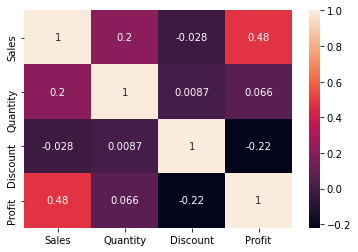

In [15]:
sns.heatmap(Retail.corr(), annot = True)
plt.show()

# Exploratory Data Analysis

In [16]:
Retail.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 42
Nevada        

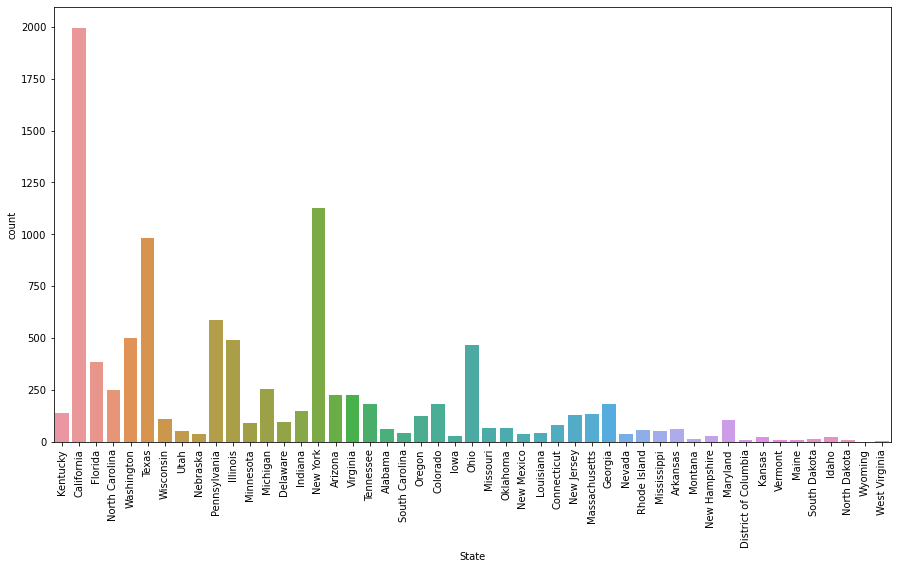

In [17]:
print(Retail['State'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=Retail['State'])
plt.xticks(rotation=90)
plt.show()

This countplot shows the number of sales per state which will help us find the state which has the maximum number of sales.
California has the maximum number of sales followed by New York and then Texas,this clearly show that we can target these states to increase the sales.
With a big trailing gap, New York has the second highest dealings, with around 1,125 of total dealings.

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


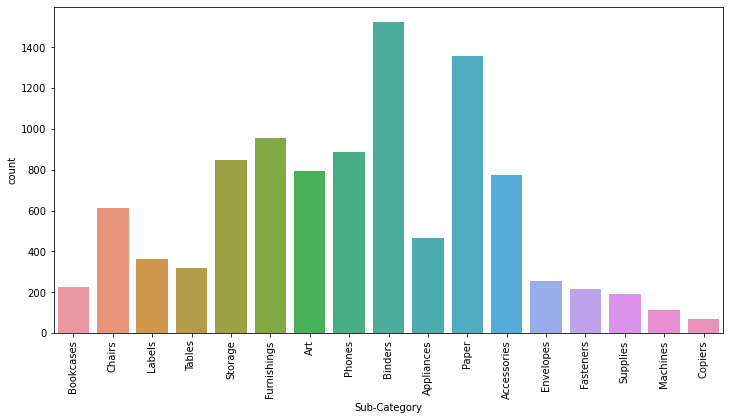

In [18]:
print(Retail['Sub-Category'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x=Retail['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

This is a countplot showing the Sub-Catagory wise distribution of the number of sales.

<AxesSubplot:xlabel='Segment', ylabel='count'>

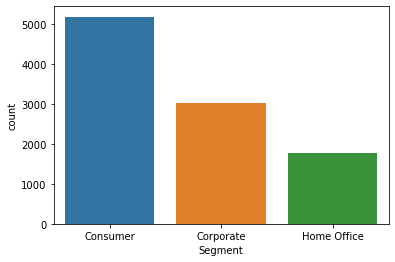

In [19]:
sns.countplot(x=Retail['Segment'])

<AxesSubplot:xlabel='Region', ylabel='count'>

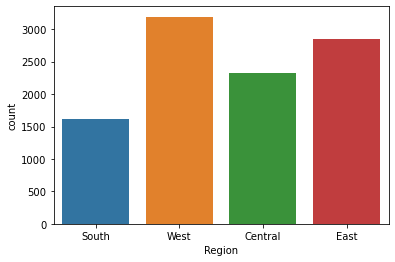

In [20]:
sns.countplot(x=Retail['Region'])

Kernel density estimate (KDE) plots, using the kde() method, will visualise the overall distribution through a continuous probability density curve. This generates two histogram density plots and their continuous probability density curves for Sales and Profit in the same figure space, and clearly differentiates them by specifying different colours in its parameters. The xlim() method restricts plot range to 0 and above for meaningful visualisations, since it is impossible for Sales to have a negative value and more interest is placed on Profits in this case study.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


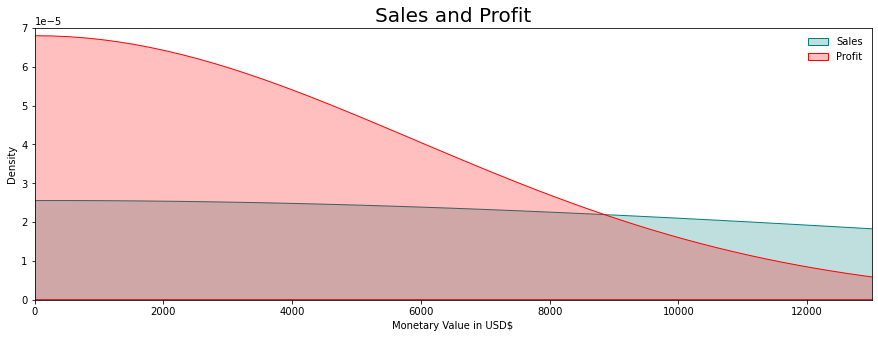

In [21]:
plt.figure(figsize = (15, 5))
# plot Sales and Profit for comparisons
sns.kdeplot(Retail['Sales'], color = 'Teal', label = 'Sales', shade = True, bw = 25)
sns.kdeplot(Retail['Profit'], color = 'Red', label = 'Profit', shade = True, bw = 25)
plt.xlim([0, 13000])
plt.ylim([0, 0.00007])
plt.ylabel('Density')
plt.xlabel('Monetary Value in USD$')
plt.title('Sales and Profit', fontsize = 20)
plt.legend(loc = 'upper right', frameon = False) 
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


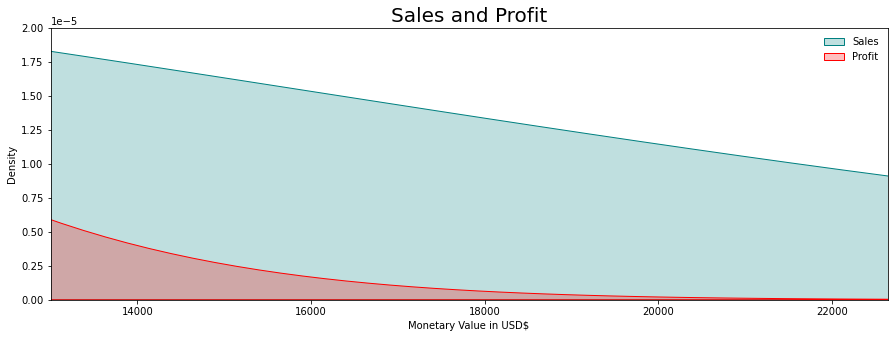

In [22]:
plt.figure(figsize = (15, 5))
# plot Sales and Profit for comparisons
sns.kdeplot(Retail['Sales'], color = 'Teal', label = 'Sales', shade = True, bw = 25)
sns.kdeplot(Retail['Profit'], color = 'Red', label = 'Profit', shade = True, bw = 25)
plt.xlim([13000, 22640])
plt.ylim([0, 0.00002])
plt.ylabel('Density')
plt.xlabel('Monetary Value in USD$')
plt.title('Sales and Profit', fontsize = 20)
plt.legend(loc = 'upper right', frameon = False) 
plt.show()

Profits are mostly above sales, indicating good business. However, there are some instances where profits can be improved, such as at the USD$9,000 sales mark onwards.

The histogram density plots' highest points in the curves show the pattern of more sales transactions with less than USD1k monetary value, and the highest profit is gained when the value is less than USD500.

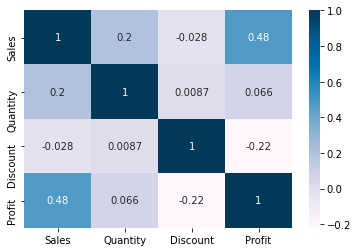

In [23]:
sns.heatmap(Retail.corr(), cmap = 'PuBu', annot = True)
plt.show()

Sales and Profit have a moderate positive linear correlation. When Sales increase by USD1, Profit will increase by USD0.48. This is indicative that this Superstore is a popular company with constant demand of the products sold, and the management may have a good ability in managing costs to ensure high profit margins.

Discount and Profit have a weak negative linear correlation. When Discount increase by 1%, Profit will decrease by USD$0.22. This is because discount deductions will reduce overall sales revenues.

Discount and Sales have little to no linear correlation. This is indicative that despite targeting to implement discounts as a promotional strategy to successfully increase sales, Superstore encouraged bad consumer psychology instead. 

Discount and Quantity have little to no linear correlation. This is indicative that implementing discounts as Superstore's promotional strategy is not attractive.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\li

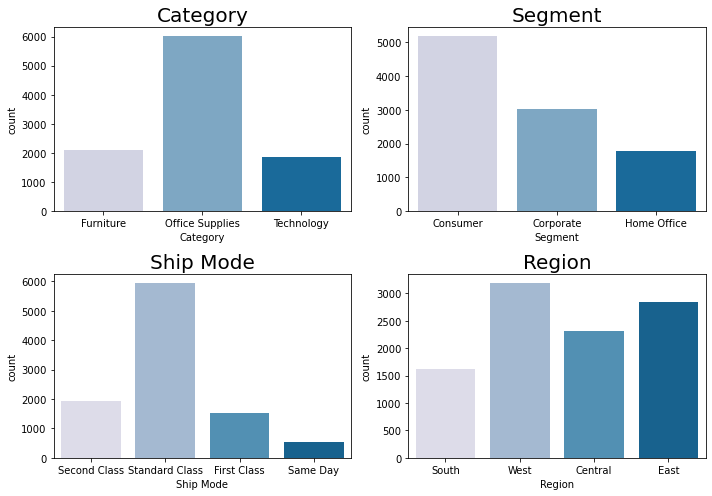

In [24]:
# count of each Category, Segment, Ship Mode, and Region
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 7));
sns.countplot(Retail['Category'], ax = axs[0][0], palette = 'PuBu')
sns.countplot(Retail['Segment'], ax = axs[0][1], palette = 'PuBu')
sns.countplot(Retail['Ship Mode'], ax = axs[1][0], palette = 'PuBu')
sns.countplot(Retail['Region'], ax = axs[1][1], palette = 'PuBu')
axs[0][0].set_title('Category', fontsize = 20)
axs[0][1].set_title('Segment', fontsize = 20)
axs[1][0].set_title('Ship Mode', fontsize = 20)
axs[1][1].set_title('Region', fontsize = 20)
plt.tight_layout()

There are 3 categories of 'Category', where “Furniture” has over 2k instances, “Office Supplies” is notably most popular with around 6k, and “Technology” has almost 2k. This clearly illustrates that data available for "Office Supplies" has almost 3 times the proportion than that for the other two categories, which will be taken note of for further data visualisations and analysis later on.

There are 3 categories of 'Segment', where “Consumer” is notably most common with over 5k instances, “Corporate” has over 3k, and “Home Office” has around 2k. This clearly illustrates that data available for "Consumer" is the sum of that of other two categories, which will be taken note of for further data visualisations and analysis later on.

There are 4 categories of 'Ship Mode', where “Standard Class” is notably most preferred with almost 6k instances, “Second Class” has almost 2k, "First Class" has over 1.5k, and “Same Day” has around 500. This clearly illustrates that data available for "Standard Class" has almost 3 times the proportion than that for "Second Class" and "First Class" categories, and 12 times that for "Same Day". This will be taken note of for further data visualisations and analysis later on.

There are 4 categories of 'Region', where “West” is the highest with over 3k instances, “East” is a close second at around 2.75k, "Central" has over 2.25k, and “South” has over 1.5. This clearly illustrates that data available for all 4 categories are differing, and this will be taken note of for further data visualisations and analysis later on.



# State Wise EDA

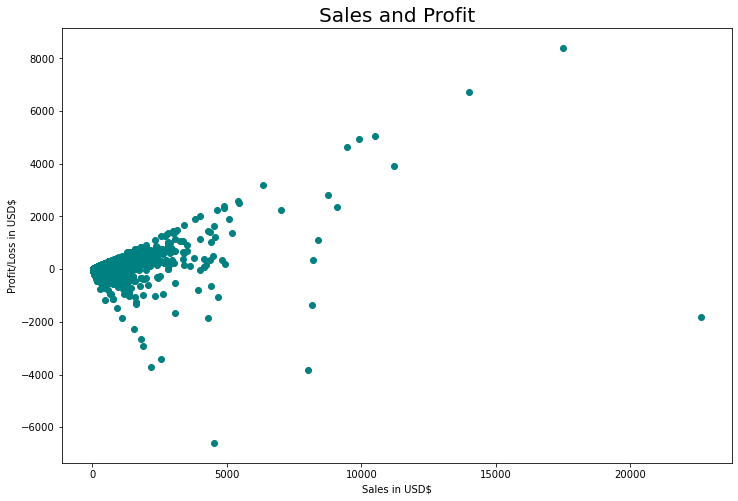

In [25]:
fig, ax = plt.subplots(figsize = (12,8))
# scatterplot of Sales and Profit
ax.scatter(Retail["Sales"] , Retail["Profit"], color = 'Teal')
ax.set_xlabel('Sales in USD$')
ax.set_ylabel('Profit/Loss in USD$')
plt.title('Sales and Profit', fontsize = 20)
plt.show()

Most sales are less than USD$5k. This is likely because a majority of the Superstore's customers are of the Consumer Segment - individuals who tend to buy and spend less than the other customer Segments comprising of groups and teams from Corporates and Home Offices.

A significant number of transactions under USD$2.5k result in a loss. One likely reason behind smaller transaction amounts is after accounting for higher discount deductions, where this will decrease overall profits and can even cause a loss.

Larger sales above USD$2.5k are very likely to result in a profit. Profit margins may be higher, after economies ofm scale in cost components such as procurement, packaging, and delivery.

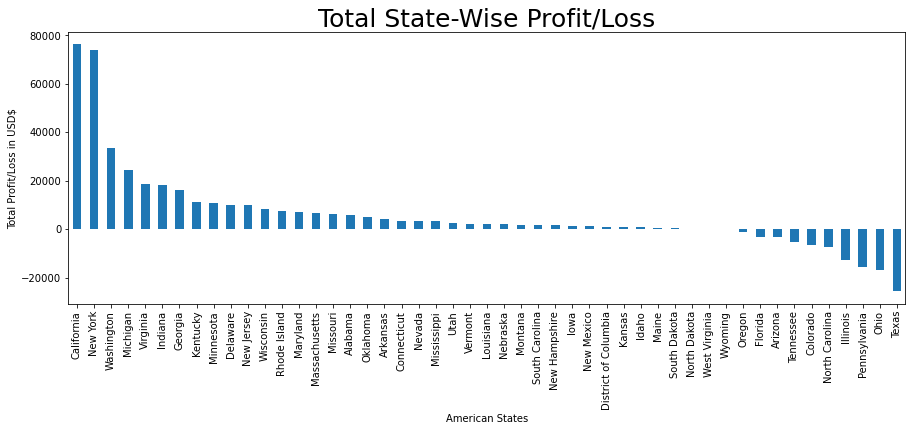

In [26]:
# total Profit for each State
df_state_profit = Retail.groupby('State')['Profit'].sum().sort_values(ascending = False).plot.bar(figsize = (15, 5), 
                                                                                              )
plt.ylabel('Total Profit/Loss in USD$')
plt.xlabel('American States')
plt.title('Total State-Wise Profit/Loss', fontsize = 25)
plt.show()

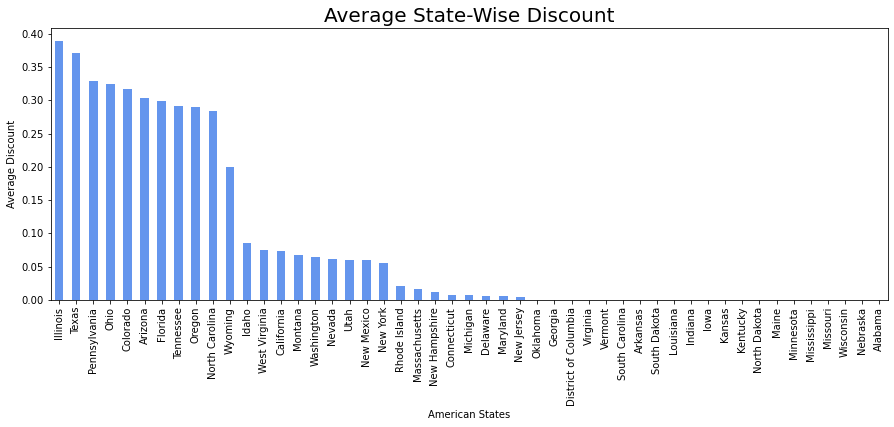

In [27]:
# average Discount for each State
df_state_profit = Retail.groupby('State')['Discount'].mean().sort_values(ascending = False).plot.bar(figsize = (15, 5), 
                                                                                                 color = 'Cornflowerblue')
plt.ylabel('Average Discount')
plt.xlabel('American States')
plt.title('Average State-Wise Discount', fontsize = 20)
plt.show()

California and New York retained their top 2 places, with the notably higher total profits of around USD$75k.

With a big trailing gap, Washington is third with around USD$35k of total profits.

Texas, despite having the third highest dealings and sales, suffered the highest loss of around USD$25k. This may be due to it having the second highest discount level.

California gives out considerably lower discounts, which may be one of the main reasons behind it being top in sales and profits by a significant margin. 

More than half the states make little to no profit, and a significant number of these even suffer from a notable loss.

A majority of states offer slight discounts under 10%.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  

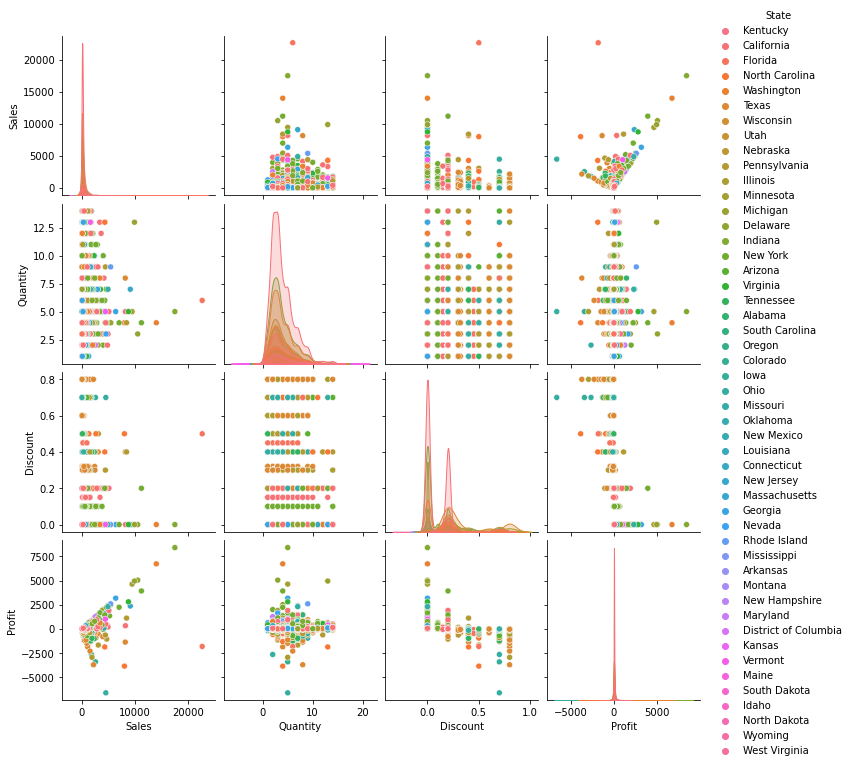

In [28]:
figsize=(15,10)
sns.pairplot(Retail,hue='State')

# Sub-Catagory Wise

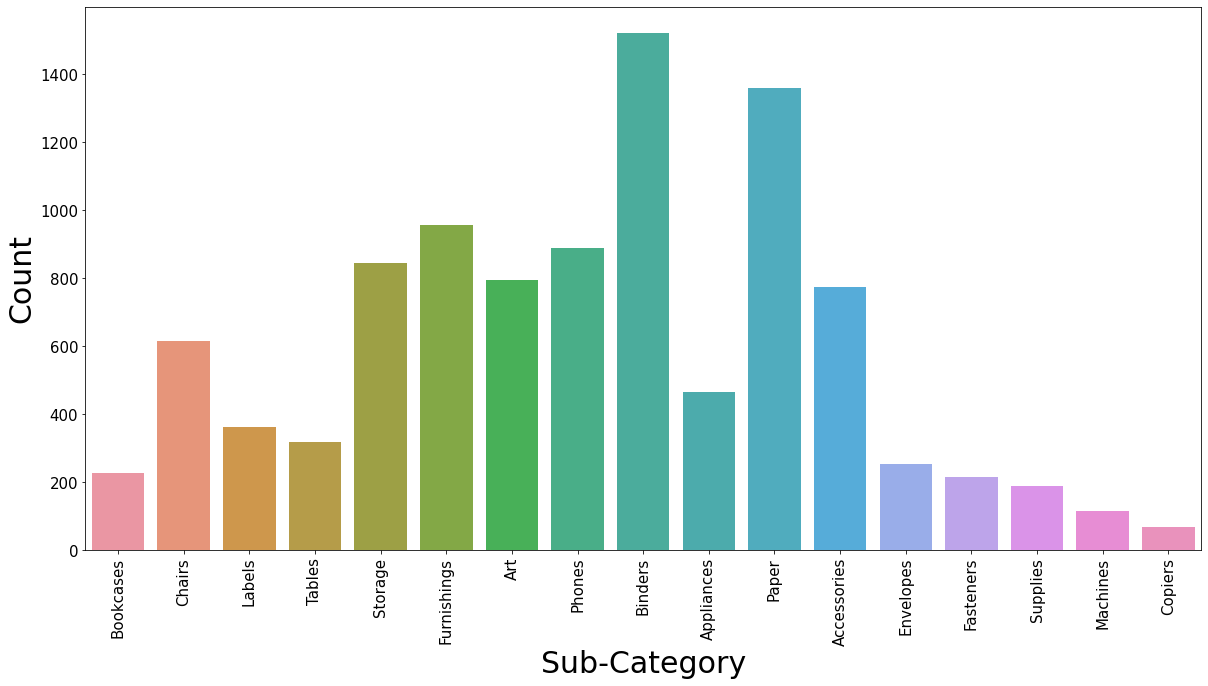

In [29]:
plt.figure(figsize=(20,10))
ed=sns.countplot(x="Sub-Category", data=Retail)
ed.set_xticklabels(ed.get_xticklabels(),rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Sub-Category', fontsize=30) 
plt.ylabel('Count', fontsize=30)
plt.show()  

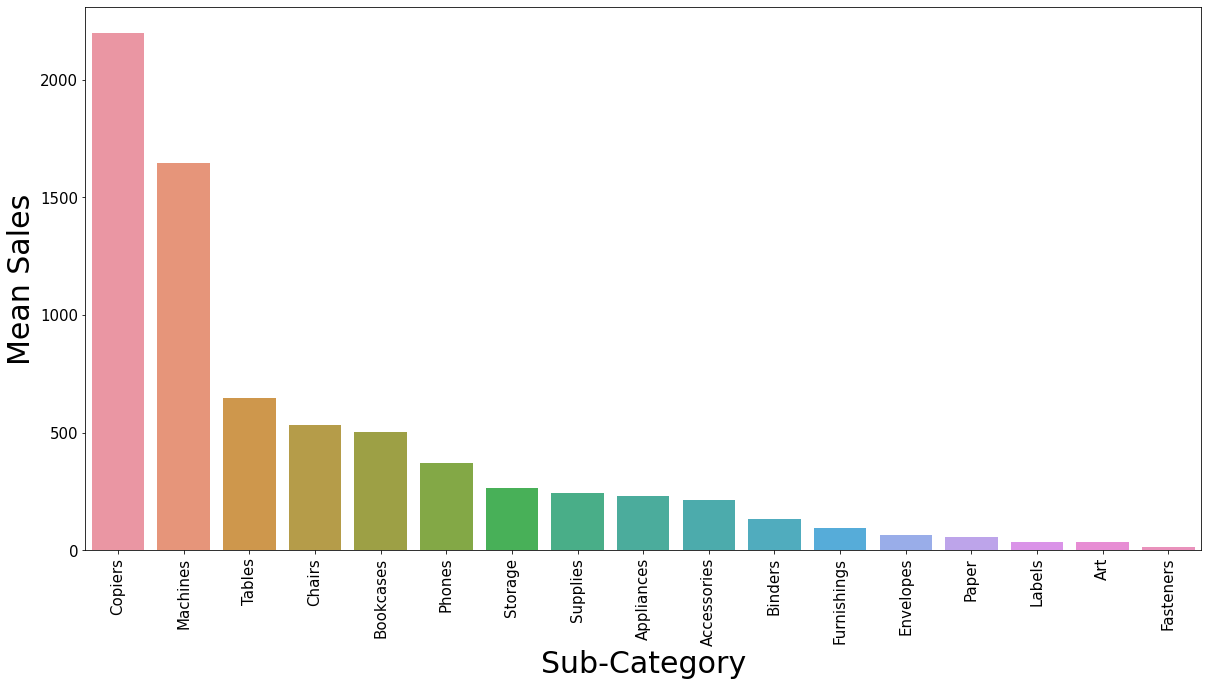

In [30]:
plt.figure(figsize=(20,10))
sub = Retail.groupby(['Sub-Category'])['Sales'].mean().sort_values(ascending = False).reset_index()
ed=sns.barplot(x = 'Sub-Category', y='Sales', data=sub)
ed.set_xticklabels(ed.get_xticklabels(),rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Sub-Category', fontsize=30) 
plt.ylabel('Mean Sales', fontsize=30)
plt.show()


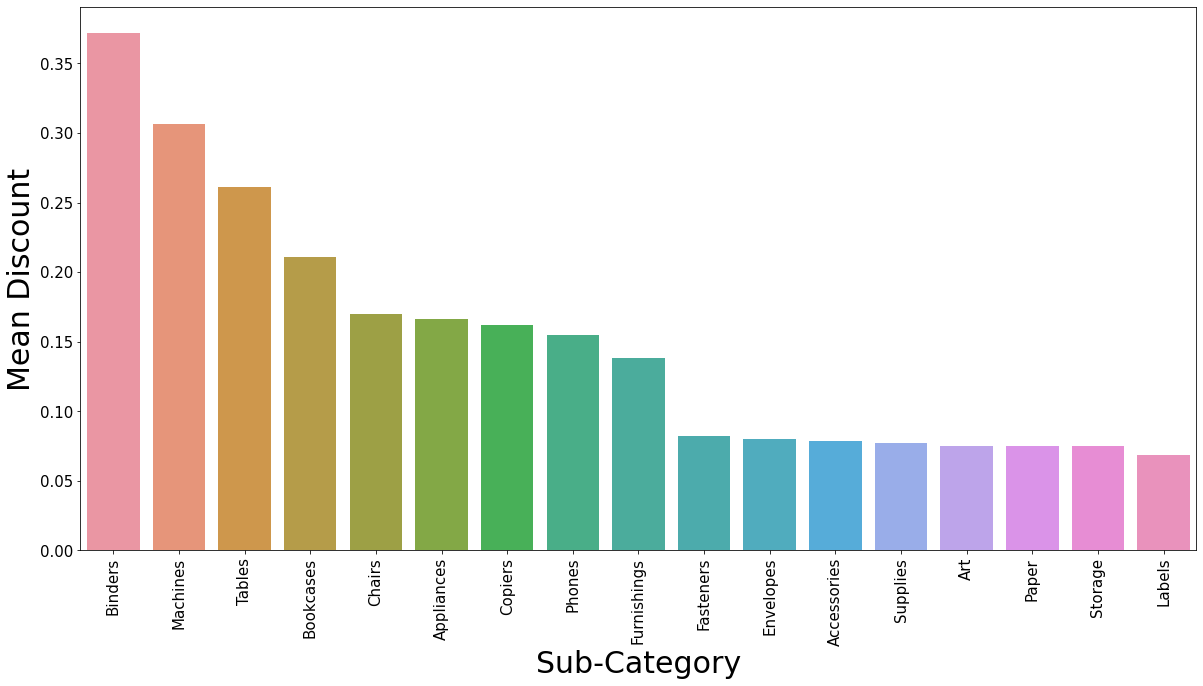

In [31]:
plt.figure(figsize=(20,10))
sub1 = Retail.groupby(['Sub-Category'])['Discount'].mean().sort_values(ascending = False).reset_index()
ed=sns.barplot(x = 'Sub-Category', y='Discount', data=sub1)
ed.set_xticklabels(ed.get_xticklabels(),rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Sub-Category', fontsize=30) 
plt.ylabel('Mean Discount', fontsize=30)
plt.show()

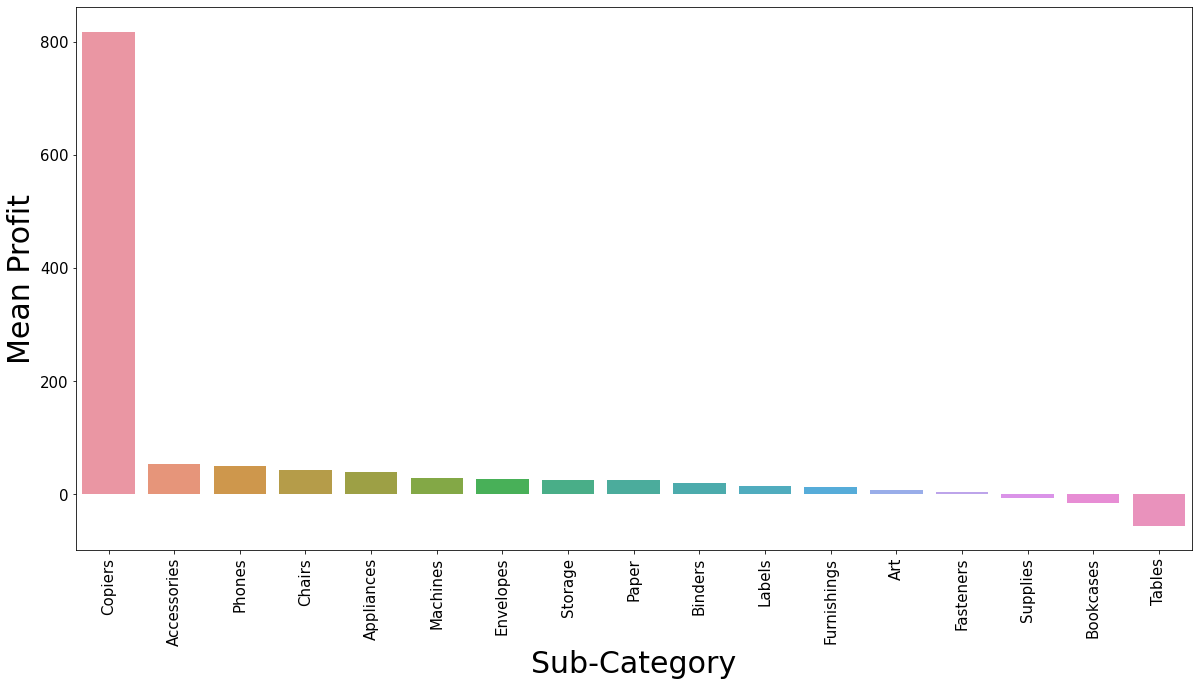

In [32]:
plt.figure(figsize=(20,10))
sub2 = Retail.groupby(['Sub-Category'])['Profit'].mean().sort_values(ascending = False).reset_index()
ed=sns.barplot(x = 'Sub-Category', y='Profit', data=sub2)
ed.set_xticklabels(ed.get_xticklabels(),rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Sub-Category', fontsize=30) 
plt.ylabel('Mean Profit', fontsize=30)
plt.show()

As you can see in the above graphs that the Binder has the maximum sales as the discount on the binders is the highest so the customers will be attracted to buy the binders.The mean sales of binders is not so high and also the mean profit on the binders is close to 0.So the supermarket is not earing on the sales of binders.

Copiers have the highest profit margins ,the count of the sales of copiers is less .The sales mean is the highest as the profit earned in copiers is highest so as to the supermaket should try to increase the sales of the copiers to make higher amount of profits.

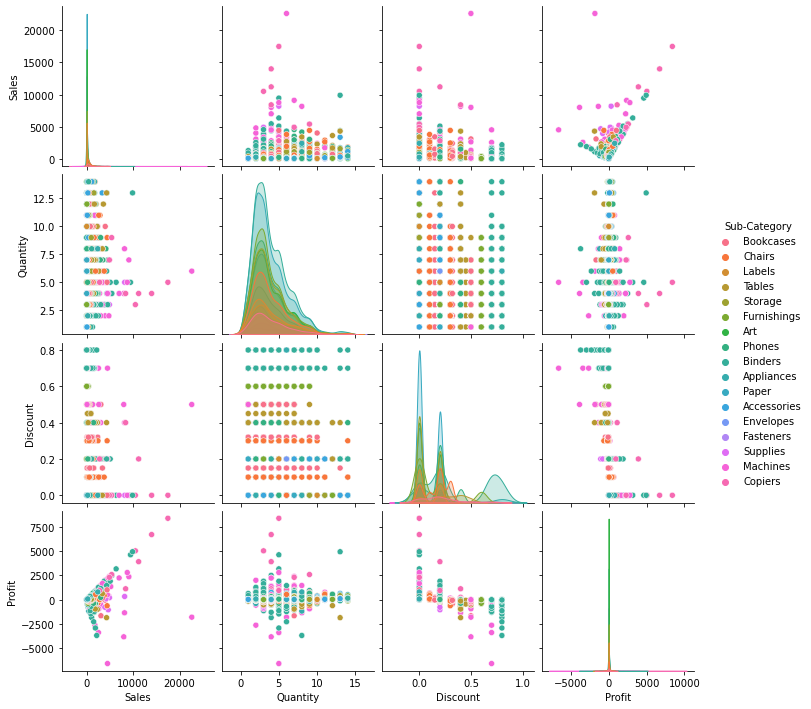

In [33]:
figsize=(15,10)
sns.pairplot(Retail,hue='Sub-Category')

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


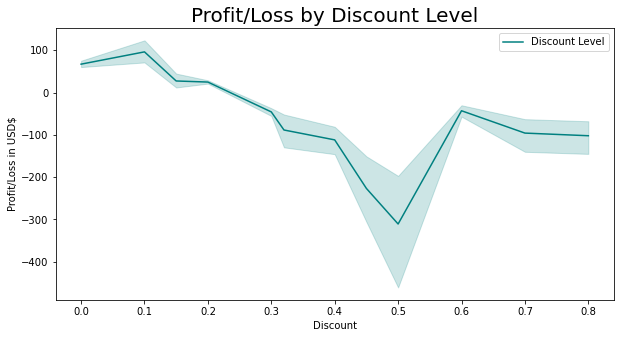

In [34]:
plt.figure(figsize = (10, 5))
# profit/loss by Discount level
sns.lineplot('Discount', 'Profit', data = Retail, color = 'Teal', label = 'Discount Level')
plt.ylabel('Profit/Loss in USD$')
plt.title('Profit/Loss by Discount Level', fontsize = 20)
plt.show()

Losses will likely occur for higher discount levels above 20%. In other words, between 0% and 20% of discounts, a profit can be made by reducing the occurences of lowered prices after discount deductions. 

The worst losses occured when discount approximates 50%. This may indicate festivals, end-of-season sales, and clearance sales for older designs.

Superstore is most profitable when discount levels lower than 10% are offered. This allows less occurences of lowered prices after discount deductions, and thus larger profit margins and profits.

In [35]:
Q1 = Retail.quantile(q = 0.25, axis = 0, numeric_only = True, interpolation = 'linear')

Q3 = Retail.quantile(q = 0.75, axis = 0, numeric_only = True, interpolation = 'linear')

In [36]:
Inter_Quartile_Range = Q3 - Q1

print(Inter_Quartile_Range )

Sales       192.6700
Quantity      3.0000
Discount      0.2000
Profit       27.6458
dtype: float64
